## imports

In [17]:
import pandas as pd
from pandas import DataFrame
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx



pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')


## Read in data and impute. 
Be sure to first run /data/convert_to_country_list.py 

In [2]:
df = pd.read_csv("../data/unhcr_popstats_export_asylum_seekers_monthly_all_data.csv",skiprows=3)
df.head()

,Country / territory of asylum/residence,Origin,Year,Month,Value
0,Australia,Afghanistan,1999,January,8
1,Australia,Afghanistan,1999,February,10
2,Australia,Afghanistan,1999,March,25
3,Australia,Afghanistan,1999,April,25
4,Australia,Afghanistan,1999,May,7


In [3]:
# rename columns
df.columns = ["destination","origin","year","month","value"]

# impute *s
df.value = df.value.apply(lambda x:int(x) if x !="*" else np.random.randint(1,4))
df.value = df.value.astype(int)
#print(df) # len=359130
df.head()

,destination,origin,year,month,value
0,Australia,Afghanistan,1999,January,8
1,Australia,Afghanistan,1999,February,10
2,Australia,Afghanistan,1999,March,25
3,Australia,Afghanistan,1999,April,25
4,Australia,Afghanistan,1999,May,7


In [4]:
df_origin = set(df.origin)
#print(len(df_origin)) #205

# make sure you ran convert_to_country_list.py in /data already
df_cc = pd.read_csv("../data/country_list.csv")
#print(df_cc)
cc_names = set(df_cc.name_en)
#print(len(cc_names)) #227

missing_origin = []
for c in df_origin:
    if c in cc_names:
        pass
    else:
        missing_origin.append(c)

print(missing_origin)
# we have country names in the data that was not in the country list

["Dem. People's Rep. of Korea", 'Iran (Islamic Rep. of)', 'China, Macao SAR', 'Czech Rep.', 'Rep. of Korea', 'Central African Rep.', 'Tibetan', "Lao People's Dem. Rep.", 'The former Yugoslav Rep. of Macedonia', 'Dem. Rep. of the Congo', 'Palestinian', 'Dominican Rep.', 'Syrian Arab Rep.', 'Cabo Verde', 'United Rep. of Tanzania', 'Serbia and Kosovo: S/RES/1244 (1999)', 'Various/unknown', 'China, Hong Kong SAR', 'Rep. of Moldova', 'Stateless']


In [5]:
df_destination = set(df.destination)
#print(len(df_destination)) #45

missing_destination = []
for c in df_destination:
    if c in cc_names:
        pass
    else:
        missing_destination.append(c)

print(missing_destination)
# we have country names in the data that was not in the country list

['The former Yugoslav Rep. of Macedonia', 'USA (EOIR)', 'USA (INS/DHS)', 'Czech Rep.', 'Serbia and Kosovo: S/RES/1244 (1999)', 'Rep. of Korea']


## Where refugees come from

In [6]:
# overall historical total
outflows = df.groupby(["origin"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(outflows)



                                                origin    value
176                                   Syrian Arab Rep.  1177376
0                                          Afghanistan  1109590
85                                                Iraq  1018338
158               Serbia and Kosovo: S/RES/1244 (1999)   643720
37                                               China   458218
148                                 Russian Federation   420518
84                              Iran (Islamic Rep. of)   419357
134                                           Pakistan   394199
131                                            Nigeria   342928
165                                            Somalia   323736
59                                             Eritrea   287112
186                                             Turkey   278598
115                                             Mexico   218887
1                                              Albania   217407
82                                      

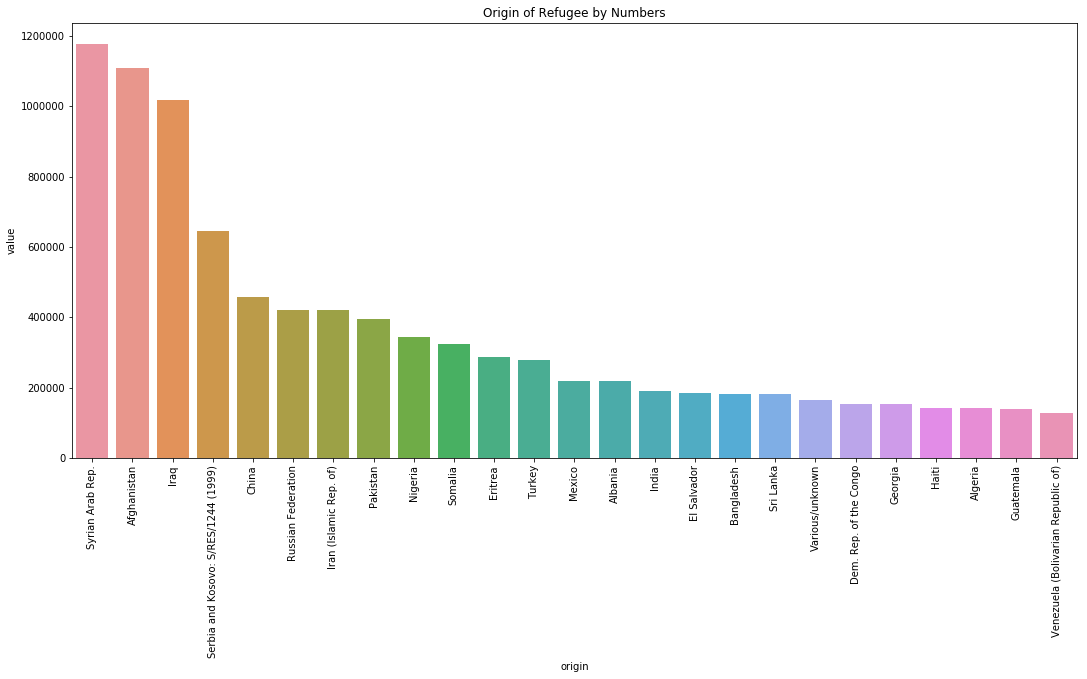

In [7]:
outflows_graph = outflows.head(25)

plt.figure(figsize=(18,8));
ax = sns.barplot(outflows_graph.origin, outflows_graph.value);
plt.title("Origin of Refugee by Numbers");
plt.xticks(rotation='vertical');
plt.show();




In [8]:
# break down by year
outflows_by_year = df.groupby(["origin", "year"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(outflows_by_year)

                                    origin  year   value
3264                      Syrian Arab Rep.  2015  382513
3265                      Syrian Arab Rep.  2016  341030
16                             Afghanistan  2015  258518
17                             Afghanistan  2016  224759
1618                                  Iraq  2015  186617
1619                                  Iraq  2016  160906
3263                      Syrian Arab Rep.  2014  148729
2903  Serbia and Kosovo: S/RES/1244 (1999)  1999  115491
18                             Afghanistan  2017  112612
3266                      Syrian Arab Rep.  2017  101020
1620                                  Iraq  2017   92880
2919  Serbia and Kosovo: S/RES/1244 (1999)  2015   88038
19                             Afghanistan  2018   76409
1617                                  Iraq  2014   68591
36                                 Albania  2015   67432
3267                      Syrian Arab Rep.  2018   60784
15                             

In [9]:
# past 5 years
outflows_by_year_recent = outflows_by_year[outflows_by_year['year']>=2014]
print(outflows_by_year_recent)

                                     origin  year   value
3264                       Syrian Arab Rep.  2015  382513
3265                       Syrian Arab Rep.  2016  341030
16                              Afghanistan  2015  258518
17                              Afghanistan  2016  224759
1618                                   Iraq  2015  186617
1619                                   Iraq  2016  160906
3263                       Syrian Arab Rep.  2014  148729
18                              Afghanistan  2017  112612
3266                       Syrian Arab Rep.  2017  101020
1620                                   Iraq  2017   92880
2919   Serbia and Kosovo: S/RES/1244 (1999)  2015   88038
19                              Afghanistan  2018   76409
1617                                   Iraq  2014   68591
36                                  Albania  2015   67432
3267                       Syrian Arab Rep.  2018   60784
15                              Afghanistan  2014   59271
1599          

## Where refugees go

In [10]:
# historical overall
inflows = df.groupby(["destination"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(inflows)

                                          destination    value
14                                            Germany  2433533
13                                             France  1042151
43                                      USA (INS/DHS)  1002178
44  United Kingdom of Great Britain and Northern I...   846087
38                                             Sweden   715185
41                                             Turkey   666857
19                                              Italy   575180
42                                         USA (EOIR)   571964
6                                              Canada   545889
2                                             Austria   481709
3                                             Belgium   397321
39                                        Switzerland   389696
27                                        Netherlands   384057
16                                            Hungary   326758
15                                             Greece  

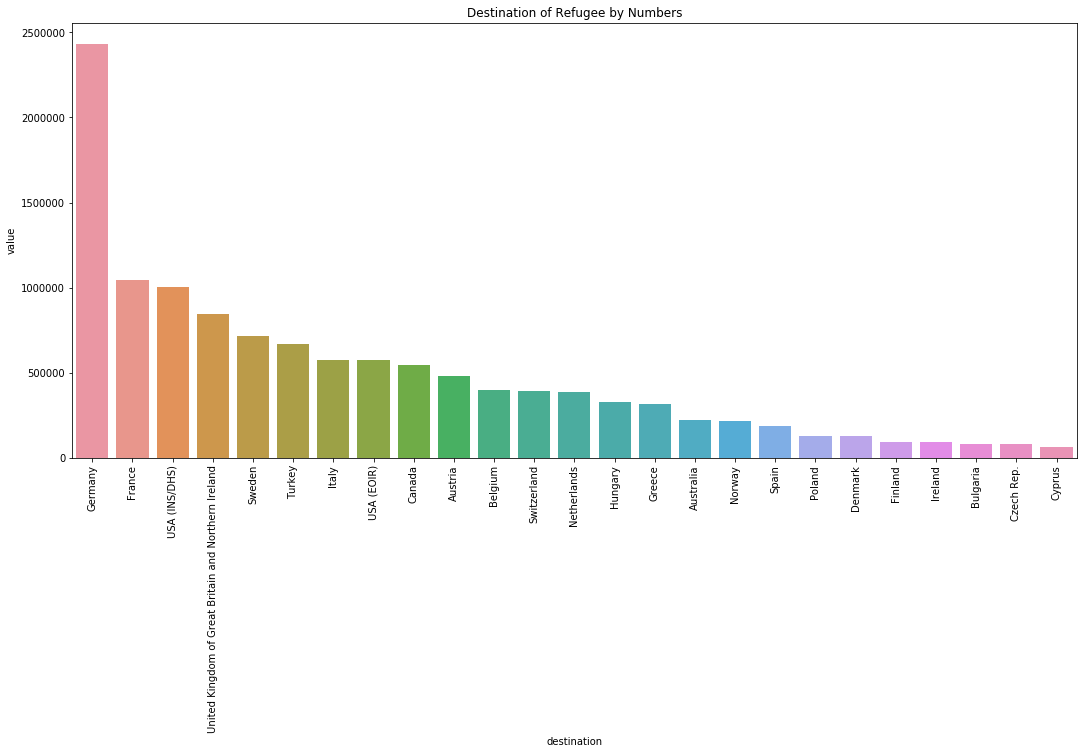

In [11]:
inflows_graph = inflows.head(25)

plt.figure(figsize=(18,8));
ax = sns.barplot(inflows_graph.destination, inflows_graph.value);
plt.title("Destination of Refugee by Numbers");
plt.xticks(rotation='vertical');
plt.show();





In [12]:
# break down destination by year
inflows_by_year = df.groupby(["destination", "year"])["value"].sum().reset_index().sort_values("value", ascending=False)
print(inflows_by_year)

                                           destination  year   value
274                                            Germany  2016  722364
273                                            Germany  2015  441899
275                                            Germany  2017  181413
313                                            Hungary  2015  174430
272                                            Germany  2014  173072
715                                             Sweden  2015  156459
810                                      USA (INS/DHS)  2017  138691
769                                             Turkey  2015  133585
364                                              Italy  2017  126847
809                                      USA (INS/DHS)  2016  124251
771                                             Turkey  2017  123974
791                                         USA (EOIR)  2017  123253
363                                              Italy  2016  122124
276                               

In [13]:
# past 5 years
inflows_by_year_recent = inflows_by_year[inflows_by_year['year']>=2014]
print(inflows_by_year_recent)

                                           destination  year   value
274                                            Germany  2016  722364
273                                            Germany  2015  441899
275                                            Germany  2017  181413
313                                            Hungary  2015  174430
272                                            Germany  2014  173072
715                                             Sweden  2015  156459
810                                      USA (INS/DHS)  2017  138691
769                                             Turkey  2015  133585
364                                              Italy  2017  126847
809                                      USA (INS/DHS)  2016  124251
771                                             Turkey  2017  123974
791                                         USA (EOIR)  2017  123253
363                                              Italy  2016  122124
276                               

## Refugees from-to plot

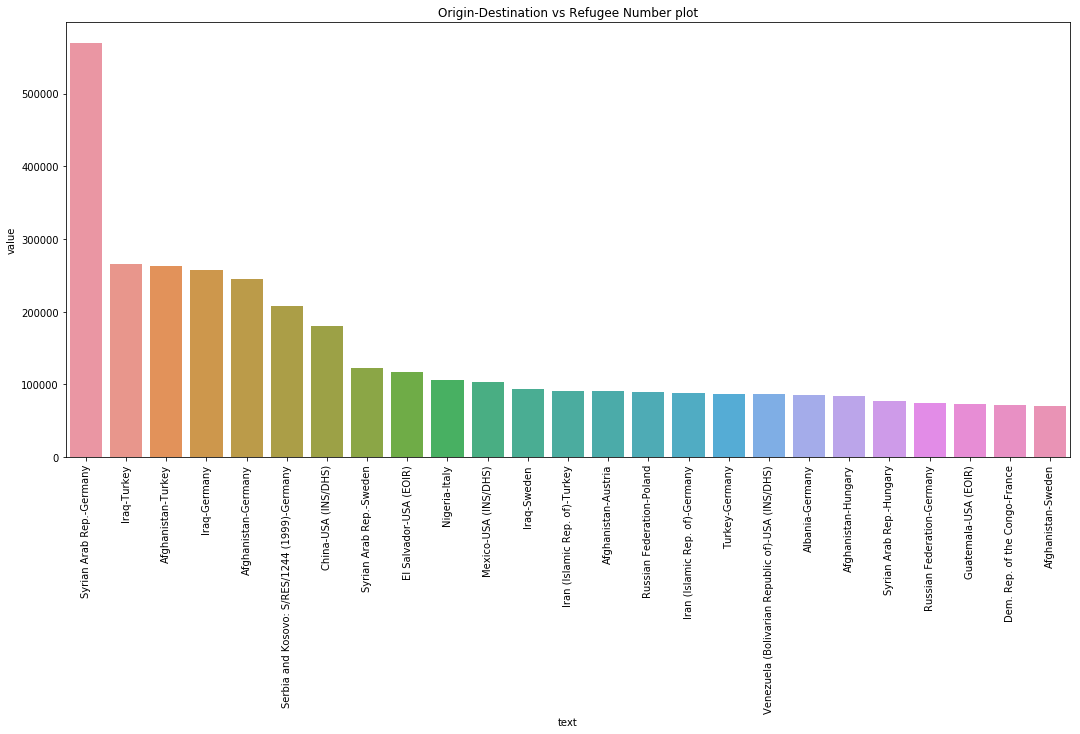

In [14]:
from_to_values = df.groupby(["origin",'destination'])['value'].sum().reset_index().sort_values("value", ascending=False)
#print(from_to_values)

from_to_values["text"] = from_to_values.apply(lambda row:row["origin"]+"-"+row["destination"],axis=1)
from_to_values = from_to_values.sort_values(["value"],ascending=False).head(25)

plt.figure(figsize=(18,8));
ax = sns.barplot(from_to_values.text, from_to_values.value);
plt.title("Origin-Destination vs Refugee Number plot");
plt.xticks(rotation='vertical');
plt.show();


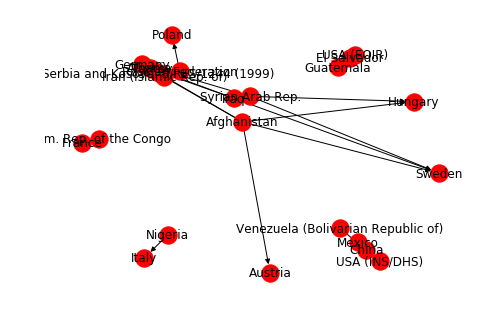

In [21]:
edge_list=from_to_values[['origin', 'destination', 'value']]
edges = list(map(tuple, list(edge_list.values)))
DG = nx.DiGraph()
DG.add_weighted_edges_from(edges)

#print(edges)
nx.draw(DG,with_labels=True)

plt.show()